# Verification 
Check that the MIS script produces valid results

In [1]:
# Imports
import datetime
from IPython.display import clear_output
import itertools
import json
import subprocess
import warnings

import matplotlib.pyplot as plt
import networkx as nx

After imports, we generate a network on which to operate. This network is written as an edgelist (the only format that MIS currently takes). Reading the edgelist back in to re-make `g` converts the node identifiers from `int` to `str`.

/Users/james/IdeaProjects/maximal_independent_set/.venv/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


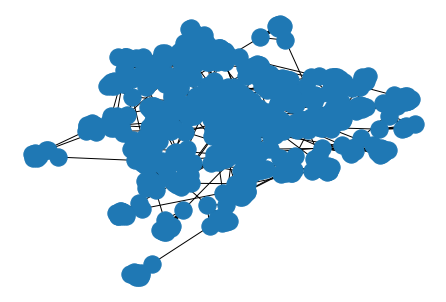

In [2]:
# Generate a network
infile = "examples.txt"
g = nx.generators.community.gaussian_random_partition_graph(
    1000,
    20,
    5,
    0.7,
    0.0002
)
nx.write_edgelist(g, infile)
g = nx.read_edgelist(infile)
with warnings.catch_warnings():
    nx.draw(g)
plt.show()

In [3]:
# This function uses a given i
def run(infile, side="max"):
    command = ["./binaries/OSx/x86_64/mis",
        "-g", f"{infile}",
        "-n", "10000",
        "-t", "4",
        ]
    if side == "min":
        command += ["-s"]
    elif side == "max":
        pass
    else:
        raise Exception("Value for side must be 'max' or 'min'")
    
    result = json.loads(subprocess.check_output(command))
    return result
    

In [4]:
def verify(result):
    neighbors = {}
    for i in result["members"]:
        neighbors[i] = set(g.neighbors(i))
    
    # Check that no node in the result is a neighbor of an  existing node.
    for i,j in itertools.combinations(result["members"], 2):
        assert(i not in neighbors[j])
        assert(j not in neighbors[i])
    
    # Check that all nodes are either (1) in the result or (2) a neighbor.
    complete = set()
    for i, v in neighbors.items():
        complete.add(i)
        complete.update(v)

    assert(not set(g.nodes()) - complete)
    

In [5]:
smallest_best = {"size":999999, "members": []}
largest_best = {"size":0, "members": []}

counter = 0
t0 = datetime.datetime.now()

for _ in range(999999):
    # Large
    result = run(infile)
    verify(result)
    # If the result size is larger, update.
    if result['size'] > largest_best["size"]:
        largest_best = result

    # Small
    result = run(infile, side="min")
    verify(result)
    # If the result size is smaller, update.
    if result['size'] < smallest_best["size"]:
        smallest_best = result
    
    counter += 10_000
    
    clear_output(wait=True)
    print(f"{datetime.datetime.now() - t0}: Counter @ {counter:,}")
    print()
    print(smallest_best)
    print()
    print(largest_best)

0:01:40.132227: Counter @ 310,000

{'size': 83, 'members': ['651', '669', '706', '162', '534', '465', '685', '784', '439', '579', '842', '835', '662', '605', '861', '229', '736', '357', '549', '307', '728', '517', '876', '210', '17', '699', '101', '807', '130', '917', '561', '631', '172', '249', '973', '271', '295', '417', '637', '814', '324', '974', '174', '207', '441', '603', '85', '480', '990', '377', '5', '693', '933', '121', '760', '697', '26', '855', '877', '343', '316', '405', '142', '41', '79', '296', '235', '109', '61', '799', '521', '394', '370', '582', '240', '496', '663', '907', '938', '429', '610', '979', '815']}

{'size': 116, 'members': ['405', '197', '73', '755', '17', '267', '642', '854', '856', '646', '811', '238', '612', '455', '629', '342', '374', '849', '472', '5', '604', '580', '420', '93', '740', '909', '616', '370', '927', '691', '350', '253', '382', '285', '400', '937', '60', '127', '598', '92', '284', '77', '904', '912', '85', '306', '414', '959', '665', '471'

KeyboardInterrupt: 